## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

For this project I would choose the multivariant analytical approach combined with machine learning technques to identify the key features that indicate  red wine quality and to create predictive model.
I choose this approach and its right because of data integration, complexity handling, predictive power, scalability and actionable insights

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**


### Data Requirements for Predicting Red Wine Quality

#### Chemical and Physical Properties of Wine
The dataset should include various measurable chemical and physical properties that influence the quality of red wine. These properties may include:

- **Fixed Acidity**: Impacts the sourness of the wine.
- **Volatile Acidity**: High levels can cause the wine to have an unpleasant vinegary taste.
- **Citric Acid**: Contributes to freshness and flavor.
- **Residual Sugar**: The sugar left after fermentation, affecting the sweetness.
- **Chlorides**: Represents salt content in the wine.
- **Free Sulfur Dioxide**: Helps to prevent microbial growth and oxidation.
- **Total Sulfur Dioxide**: Should be kept below a threshold for legal purposes.
- **Density**: Related to the alcohol and sugar content.
- **pH**: Affects the acidity and taste balance.
- **Sulphates**: Affects the astringency and bitterness.
- **Alcohol**: Higher alcohol content can result in a fuller-bodied wine.

#### Quality Rating
A target variable in the dataset that represents the subjective quality of the wine, typically measured on a scale (e.g., from 0 to 10). This serves as the dependent variable for model training.

### Features for Determining the Best Quality Indicators

To determine the best quality indicators, you'll need:

- **Correlation Data**: Analyze the correlation between the above chemical and physical properties and the quality rating to identify features that have the most significant impact.
- **Feature Importance**: Use feature importance techniques such as those available in Random Forest, Decision Trees, or SHAP values to rank the features by their contribution to predicting wine quality.
- **Domain Knowledge**: Experts in oenology can provide insights into which chemical attributes are traditionally considered key quality indicators.


### Data Collection

**Q3. From where do we get our data?**

To collect the data for predicting red wine quality, we can obtain it from various sources, including:

#### Public Datasets
- **UCI Machine Learning Repository**: Offers a well-known wine quality dataset, including chemical and physical properties of wine along with quality ratings.
- **Kaggle**: Provides access to multiple wine quality datasets, which can be directly downloaded and used for analysis.

#### Wine Industry Reports
- Reports published by wine producers, associations, or industry analysts may contain valuable data on wine quality, production methods, and chemical compositions.

#### Consumer Rating Platforms
- Platforms where consumers provide reviews and ratings of different wines can offer subjective data on wine quality, including preferences for taste, aroma, and other sensory factors.

#### Academic Research
- Research papers and studies on wine quality conducted by universities and oenology experts often contain datasets related to the chemical properties and sensory evaluation of wine.


### Data Understanding

#### Link to Dataset: [UCI Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)

#### Q4. From where are red wine samples obtained?
The red wine samples in this dataset are obtained from the **Vinho Verde** region of Portugal. Vinho Verde wines are characterized by their unique light, fresh, and acidic flavors. This dataset contains physicochemical and sensory data from red wine produced in this region.

#### Q5. How can knowing the impact of each variable on the red wine quality help businesses (producers, distributors, etc)?
Understanding how different variables affect red wine quality can benefit businesses in several ways:
- **Producers**: Winemakers can adjust production processes (e.g., fermentation, sugar levels, acidity management) based on which factors most positively impact wine quality. Optimizing these variables can improve wine quality and production efficiency.
- **Distributors**: Distributors can prioritize wines with the most favorable characteristics for the market. Knowledge of quality indicators helps in marketing higher-quality wines more effectively.
- **Retailers**: Retailers can stock wines that meet specific quality thresholds, appealing to consumer preferences for wines with specific characteristics like acidity, alcohol content, or sweetness.
- **Consumer Preferences**: Understanding which features consumers rate highly (e.g., acidity, alcohol levels) can help companies create targeted products, improving customer satisfaction rstand the structure
df.head()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=';')

In [4]:
#Check the shape of data, and the datatypes of the features
shape = df.shape
shape

(1599, 12)

In [5]:
#data types
data_types = df.dtypes
data_types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#features
features =df.columns
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#checking the missing vaues
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

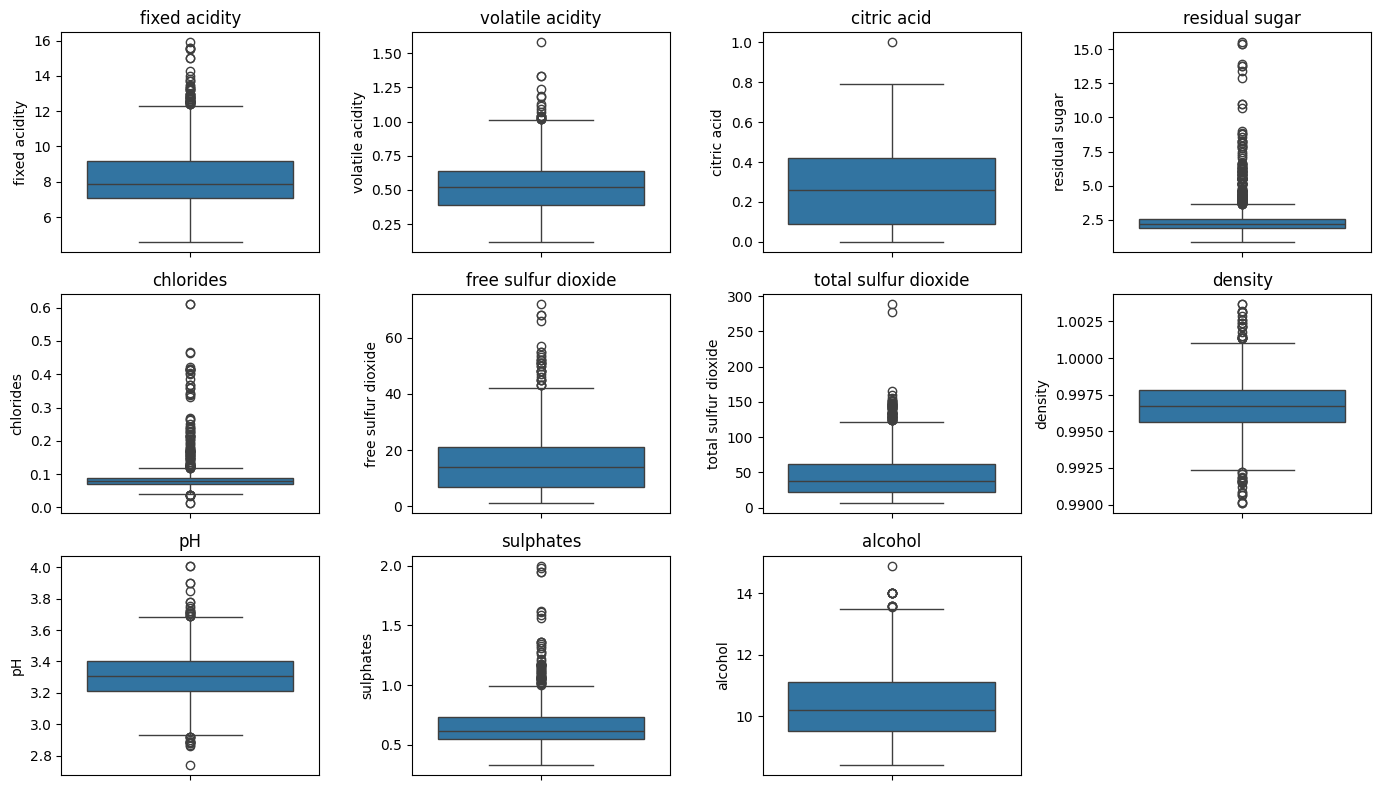

In [45]:
#outlier checking
plt.figure(figsize=(14,8))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [10]:
#Handling the outliers using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

uppper_bound =Q3+1.5*IQR
lower_bound = Q1-1.5*IQR

df_cleaned = df[~((df<lower_bound)|(df>uppper_bound)).any(axis=1)]
df_cleaned.shape

(1179, 12)

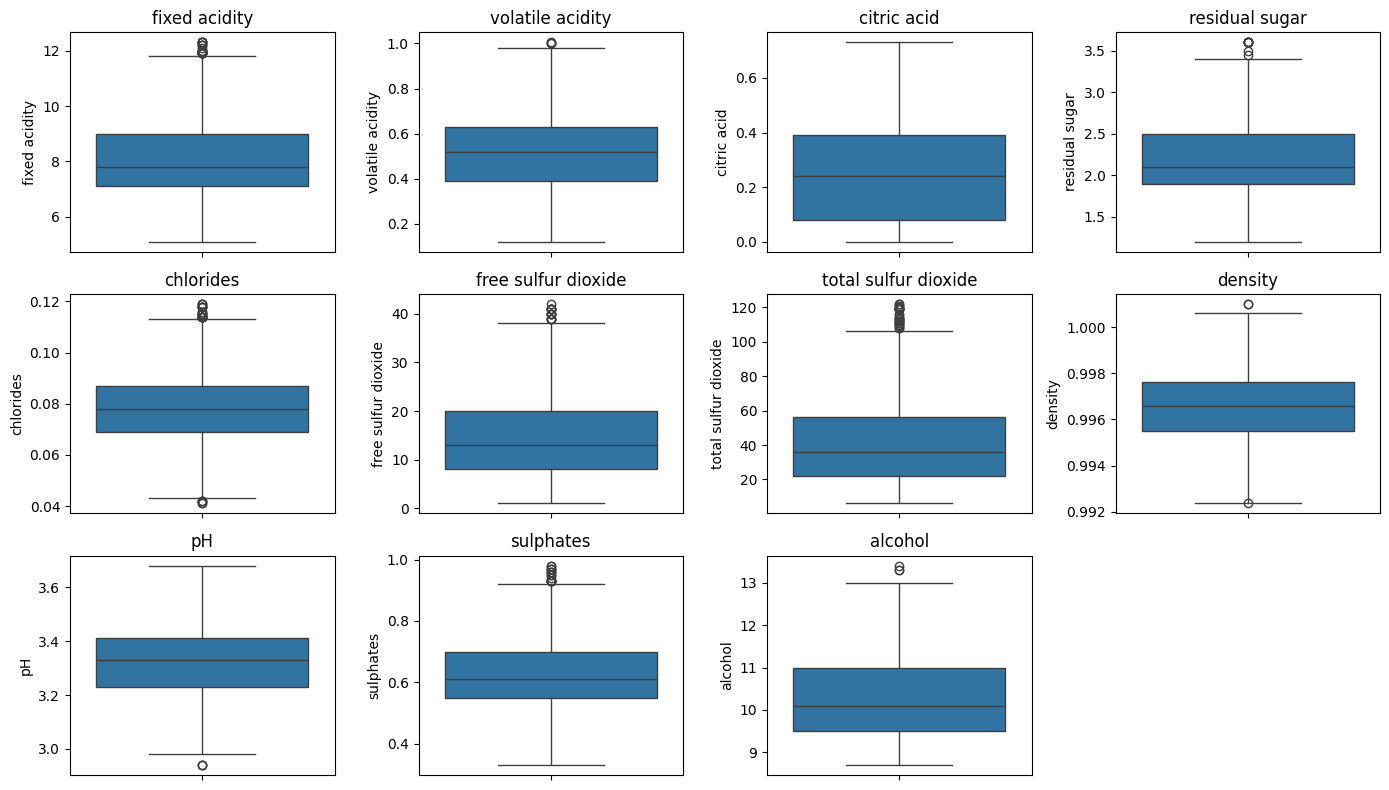

In [11]:
#plotting the graph again to see the whether outliers are removed or not
plt.figure(figsize=(14,8))
for i,col in enumerate(df_cleaned.columns[:-1],1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()



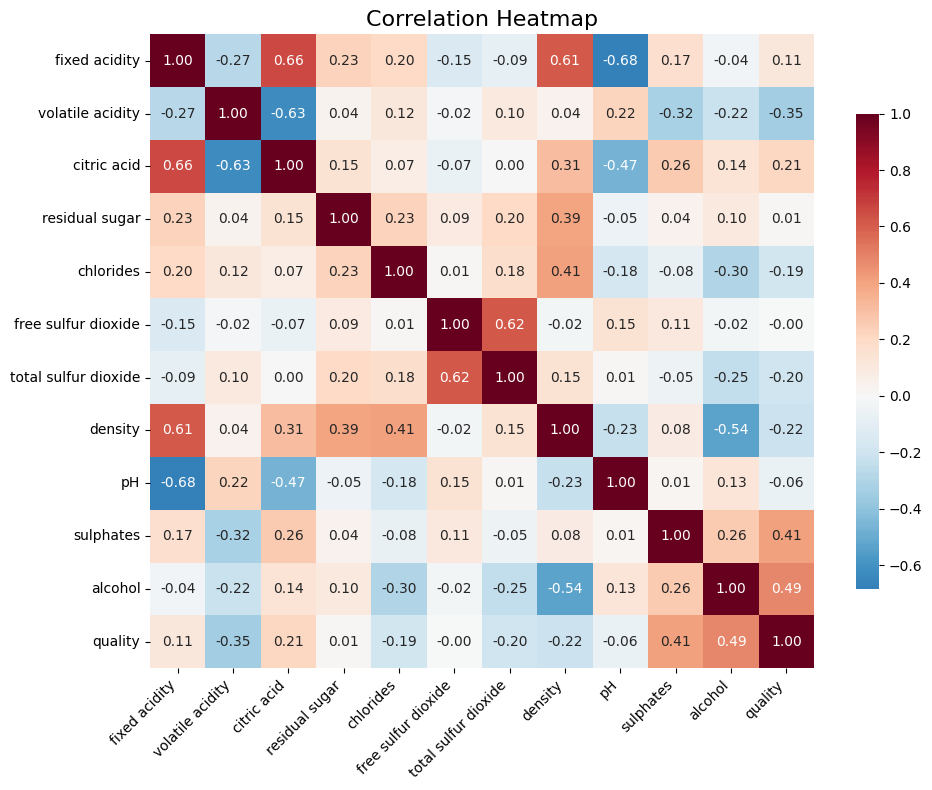

In [44]:
# Compute the correlation matrix
corr_matrix = df_cleaned.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# heatmap using Seaborn
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",   
    cmap="RdBu_r",  
    center=0,  
    cbar_kws={"shrink": 0.75} 
)

# Set the title and axis labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


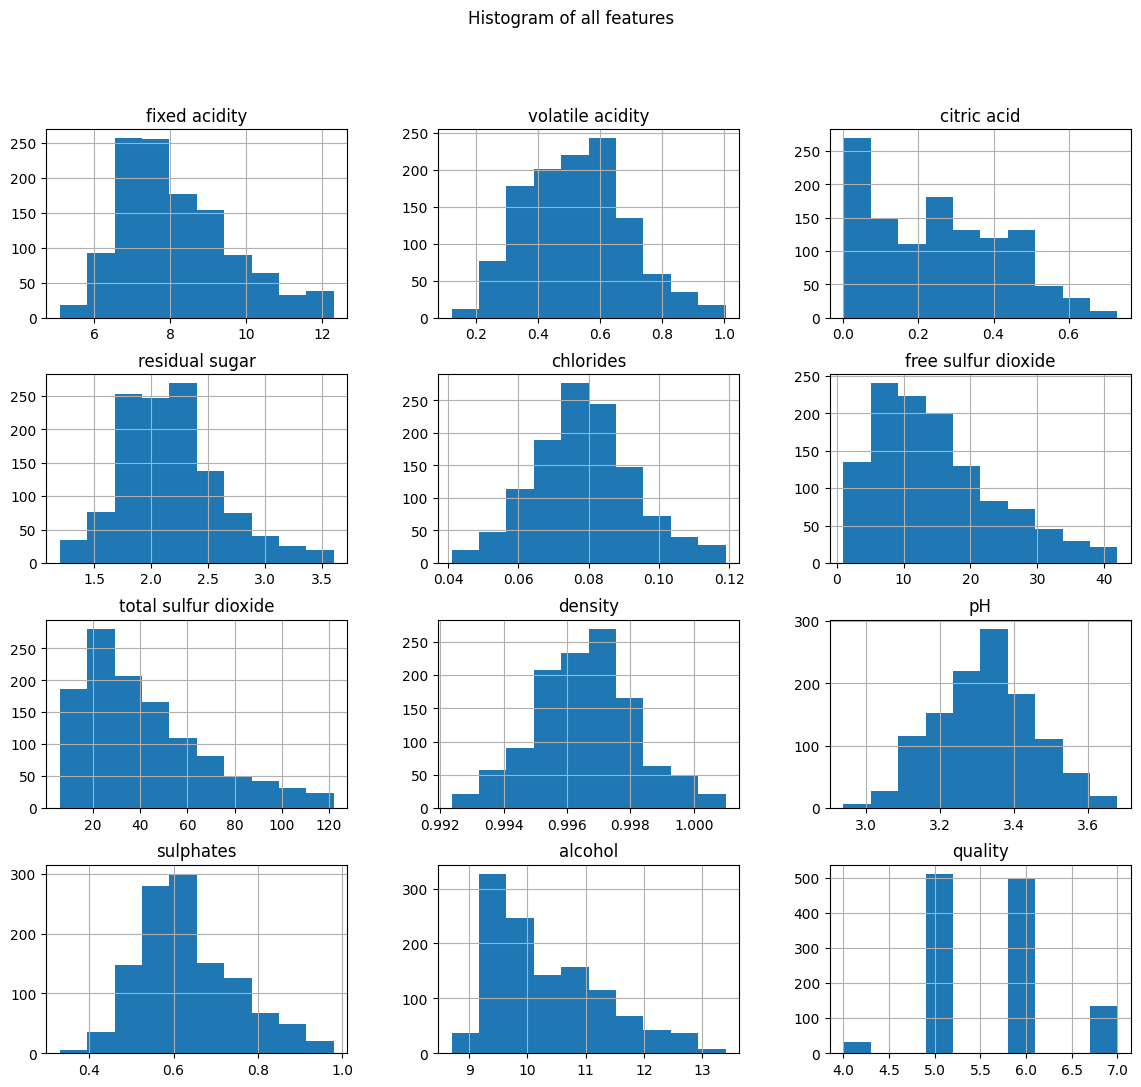

In [42]:
df_cleaned.hist(figsize=(14,12))
plt.suptitle("Histogram of all features")
plt.show()

### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>


In [14]:
# Using LinearRegression and Ridge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

In [15]:
X = df_cleaned.drop('quality',axis=1) # feature variable
y=df_cleaned['quality'] # target variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#Linear regression model
lg = LinearRegression()
lg.fit(X_train,y_train)
y_pred_linear=lg.predict(X_test)

In [17]:
#Ridge regression model
rg = Ridge(alpha=0.1)
rg.fit(X_train,y_train)
y_pred_rg=rg.predict(X_test)

In [31]:
#for feature selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [18]:
def evaluate_model(y_true,y_pred):
   mae= mean_absolute_error(y_true,y_pred)
   mse= np.sqrt(mean_squared_error(y_true,y_pred))
   r2= r2_score(y_true,y_pred)
   print(f"Mean absolute error is: {mae:.2f}")
   print(f"root mean square error is: {mse:.2f}")
   print(f"R-Squared is: {r2:.2f}")

# MAE, RMSE,  R-squared and  for LinearRegression

In [19]:
evaluate_model(y_test,y_pred_linear)

Mean absolute error is: 0.45
root mean square error is: 0.56
R-Squared is: 0.42


# MAE, RMSE,  R-squared and for Ridge

In [20]:
evaluate_model(y_test,y_pred_rg)

Mean absolute error is: 0.44
root mean square error is: 0.56
R-Squared is: 0.42


### Analysis of Performance

**Mean Absolute Error (MAE):**  
The MAE for Ridge Regression (0.44) is slightly better than that of Linear Regression (0.45). This indicates that, on average, the predictions made by the Ridge Regression model are closer to the actual values.

**Root Mean Square Error (RMSE):**  
Both models have the same RMSE value of 0.56. RMSE is sensitive to outliers, and a lower RMSE indicates better model performance. In this case, both models perform equally well based on this metric.

**R-squared:**  
The R-squared values for both models are identical at 0.42. This means that approximately 42% of the variance in the wine quality can be explained by the features used in both models. A higher R-squared value indicates a better fit, but in this case, both models have the same explanatory power.


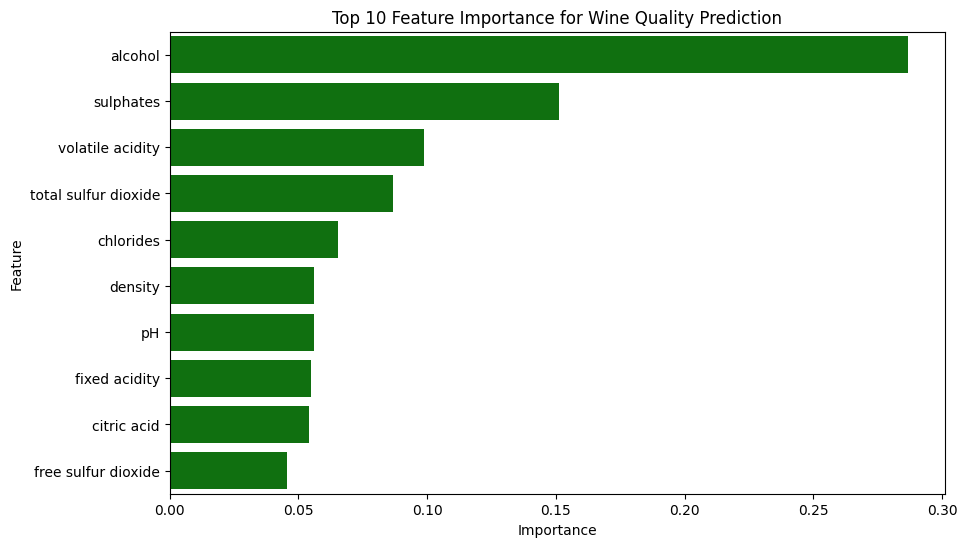

In [40]:
# Feature Importance for Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

#  feature importances
feature_importance = rf_model.feature_importances_
features = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

#  top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), color='green')
plt.title('Top 10 Feature Importance for Wine Quality Prediction')
plt.show()


### Conclusion

**Key Insights:**
- The analysis indicates that both the Linear Regression and Ridge Regression models yield similar performance metrics, with an R-squared value of approximately 0.42 for both models. This suggests that around 42% of the variance in wine quality can be explained by the selected features.
- Ridge Regression slightly outperforms Linear Regression in terms of Mean Absolute Error (MAE), with values of 0.44 and 0.45, respectively. This indicates that Ridge Regression's predictions are generally closer to the actual wine quality ratings.

**Limitation:**
- A notable limitation of this analysis is the potential influence of multicollinearity among the features. While Ridge Regression helps mitigate this issue to some extent, it may still affect the interpretability of the model coefficients and their importance.

**Future Work:**
- Future work could focus on exploring feature selection techniques to reduce multicollinearity and improve model interpretability. Additionally, incorporating more advanced machine learning algorithms, such as Random Forest or Gradient Boosting, could enhance predictive accuracy. Expanding the dataset to include more diverse wine samples would also be beneficial in improving the robustness of the models.
